# AMI Digital 2 digital encoding

<p>
    Transporting the data is not a trivial task. Often, the data is generated in a format that gets attenuated within the media. In this case, we have digital data that needs to be moved and we will use a carrier that is also digital. The digital encodig, not only adapts the carrier well to the media, it might also provide clocking and voltage accumulation avoding strategies in the same encoding pattern. 
</p>

<p>
    Here is a demostration to create and Alternate-Mark-Inversion (AMI) signal
</p>

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Digital data and signal specification

In [2]:
L = 32 # number of digital samples per data bit
voltageLevel = 5 # peak voltage level in Volts
data = (np.random.rand(10000)>0.5).astype(int) # random 1s and 0s for data
clk = np.arange(0,2*len(data)) % 2 # clock samples

## Creating the AMI encoding for the generated data

In [3]:
ami = 1*data    # the ami is just a copy of the ditial data
previousOne = 0 # fisrt iteration assumes that previous state of the data signal was zero

for ii in range(0,len(data)):  # from position 0 to last position on data signal        
    if (ami[ii]==1) and (previousOne==0):         
        ami[ii] = voltageLevel   # define next voltage level in the enconding based on current value (if 1) and previuos voltage value (after 1)
        previousOne=1;  # saving state for output signal (this mean that I went from neutral to positive)
    if (ami[ii]==1) and (previousOne==1): # if the signal is 1 and previous state was 1
        ami[ii]= -voltageLevel # the new AMI voltage should be negative and ...
        previousOne = 0;  # the state is previous state is set to zero

## bits to voltage level and clock signal

In [4]:
ami_seq = np.repeat(ami,2*L)
clk_seq = np.repeat(clk,L)
data_seq = np.repeat(data,2*L)

## Plotting

Text(0.5, 1.0, 'Alternate Mark Inversion (AMI)')

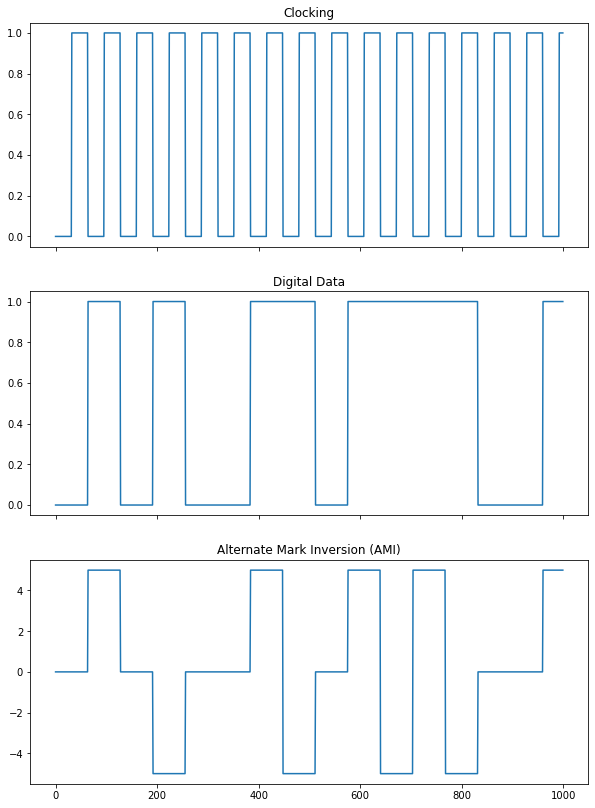

In [5]:
fig, ax = plt.subplots(3,1,sharex='col', figsize=(10, 14))
ax[0].plot(clk_seq[0:1000]);ax[0].set_title('Clocking')
ax[1].plot(data_seq[0:1000]);ax[1].set_title('Digital Data')
ax[2].plot(ami_seq[0:1000]); ax[2].set_title('Alternate Mark Inversion (AMI)')